In [3]:
import matplotlib.pyplot as plt
from utils import get_params_from_file as get_params, get_metrics_from_file as get_metrics, get_all_params, comm_dict, get_pandas_dataframe

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import numpy as np

In [3]:
prefix = "history"
filenames = ["history6.txt",
             "history8.txt",
             "history8.2.txt",
             "history8.3.txt",
             "history9.2.txt",
             "history9.3.txt",
             "history10.1.txt",
             "history10.2.txt",
             "history10.3.txt",
             "history11.1.txt"]
filenames = [prefix+'/'+f for f in filenames]

In [4]:
acc = [get_metrics(f, "acc")  for f in filenames]
loss = [get_metrics(f, "loss") for f in filenames]
val_acc = [get_metrics(f, "val_acc") for f in filenames]
val_loss = [get_metrics(f, "val_loss") for f in filenames]

In [5]:
title = [get_params(f, "save_model_name", with_name = False) for f in filenames]
title = [t[t.index('/')+1:-3] for t in title]

In [6]:
params = [get_all_params(f, False, False, 
                        "input_shape", 
                        "batch_size", 
                        "epochs", 
                        "learning_rate", 
                        "l2", 
                        "all_examples", 
                        "train_examples", 
                        "test_examples") for f in filenames]
for i in range(len(params)):
    params[i]["Accuracy"] = acc[i][-1]
    params[i]["Val Accuracy"] = val_acc[i][-1]
    params[i]["Loss"] = loss[i][-1]
    params[i]["Val Loss"] = val_loss[i][-1]

In [7]:
all_params = get_pandas_dataframe(comm_dict(params, title))

In [3]:
def set_bounds(y_bound, x_bound, y_step = None, x_step = None):
    plt.ylim(y_bound)
    plt.xlim(x_bound)
    if y_step is not None: plt.yticks(np.arange(y_bound[0],y_bound[1],y_step))
    if x_step is not None: plt.xticks(np.arange(x_bound[0],x_bound[1],x_step))

In [1]:
'''import os
val_acc = list()
path = r"models\FaceModel_whaleType\16.1_2"
for file in os.listdir(path):
    val_acc.append(float(file[-7:-3]))
val_acc = [val_acc]
title = ["16.1"]'''

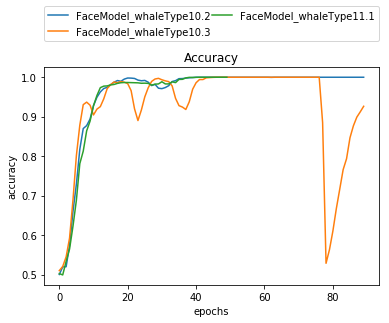

,FaceModel_whaleType10.1,FaceModel_whaleType10.2,FaceModel_whaleType10.3,FaceModel_whaleType11.1,FaceModel_whaleType6,FaceModel_whaleType8,FaceModel_whaleType8.2,FaceModel_whaleType8.3,FaceModel_whaleType9.2,FaceModel_whaleType9.3
input_shape,"(96, 96, 1)","(96, 96, 1)","(96, 96, 1)","(96, 96, 1)","(96, 96, 1)","(96, 96, 1)","(96, 96, 1)","(96, 96, 1)","(96, 96, 1)","(96, 96, 1)"
batch_size,400,400,400,400,100,200,100,400,200,200
epochs,90,90,90,50,50,90,90,90,84,84
learning_rate,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.001
l2,0.0003,0.0005,0.01,0.0007,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
all_examples,4500,4500,4500,4500,2100,4500,4500,4500,2100,2100
train_examples,3600,3600,3600,3600,1680,3600,3600,3600,1680,1680
test_examples,900,900,900,900,420,900,900,900,420,420
Accuracy,0.986944,1,0.926389,1,0.997024,0.999444,0.993889,1,0.526786,1
Val Accuracy,0.543333,0.668889,0.532222,0.803333,0.838095,0.814444,0.82,0.83,0.538095,0.840476


In [18]:
start = len(acc)-3
finish = len(acc)
[plt.plot(a, label = t) for a,t in zip(acc[start:finish],title[start:finish])]
plt.ylabel("accuracy")
plt.xlabel("epochs")
#plt.legend(handles = [a1,a2])
plt.title("Accuracy")
plt.legend(bbox_to_anchor=(0., 1.12, 1., .102), loc=3,          ncol=2, mode="expand", borderaxespad=0.)

#set_bounds(y_bound = (0.95,1), x_bound = (40,90), y_step = 0.01, x_step = 3)

plt.show()
all_params

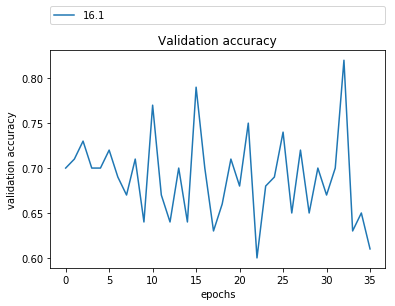

In [5]:
start = len(val_acc)-3
finish = len(val_acc)
[plt.plot(a, label = t) for a,t in zip(val_acc[start:finish],title[start:finish])]
plt.ylabel("validation accuracy")
plt.xlabel("epochs")
plt.title("Validation accuracy")
plt.legend(bbox_to_anchor=(0., 1.12, 1., .102), loc=3,          ncol=2, mode="expand", borderaxespad=0.)

#set_bounds(y_bound = (0.75,0.86), x_bound = (60,90), y_step = 0.01, x_step = 3)

plt.show()
all_params

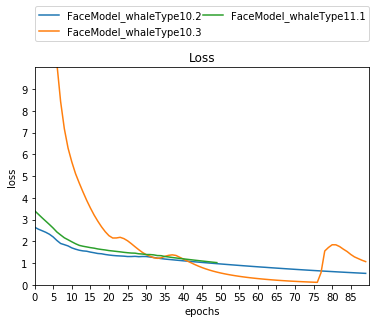

,FaceModel_whaleType10.1,FaceModel_whaleType10.2,FaceModel_whaleType10.3,FaceModel_whaleType11.1,FaceModel_whaleType6,FaceModel_whaleType8,FaceModel_whaleType8.2,FaceModel_whaleType8.3,FaceModel_whaleType9.2,FaceModel_whaleType9.3
input_shape,"(96, 96, 1)","(96, 96, 1)","(96, 96, 1)","(96, 96, 1)","(96, 96, 1)","(96, 96, 1)","(96, 96, 1)","(96, 96, 1)","(96, 96, 1)","(96, 96, 1)"
batch_size,400,400,400,400,100,200,100,400,200,200
epochs,90,90,90,50,50,90,90,90,84,84
learning_rate,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.001
l2,0.0003,0.0005,0.01,0.0007,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
all_examples,4500,4500,4500,4500,2100,4500,4500,4500,2100,2100
train_examples,3600,3600,3600,3600,1680,3600,3600,3600,1680,1680
test_examples,900,900,900,900,420,900,900,900,420,420
Accuracy,0.986944,1,0.926389,1,0.997024,0.999444,0.993889,1,0.526786,1
Val Accuracy,0.543333,0.668889,0.532222,0.803333,0.838095,0.814444,0.82,0.83,0.538095,0.840476


In [33]:
start = len(acc)-3
finish = len(acc)
[plt.plot(a, label = t) for a,t in zip(loss[start:finish],title[start:finish])]
plt.ylabel("loss")
plt.xlabel("epochs")
plt.title("Loss")
plt.legend(bbox_to_anchor=(0., 1.12, 1., .102), loc=3,          ncol=2, mode="expand", borderaxespad=0.)

set_bounds(y_bound = (0,10), x_bound = (0,90), y_step = 1, x_step = 5)

plt.show()
all_params

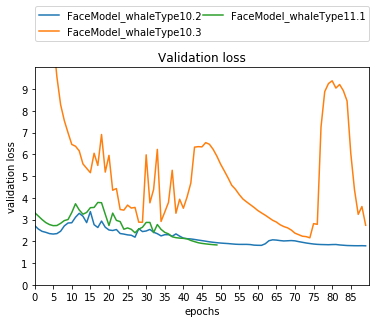

,FaceModel_whaleType10.1,FaceModel_whaleType10.2,FaceModel_whaleType10.3,FaceModel_whaleType11.1,FaceModel_whaleType6,FaceModel_whaleType8,FaceModel_whaleType8.2,FaceModel_whaleType8.3,FaceModel_whaleType9.2,FaceModel_whaleType9.3
input_shape,"(96, 96, 1)","(96, 96, 1)","(96, 96, 1)","(96, 96, 1)","(96, 96, 1)","(96, 96, 1)","(96, 96, 1)","(96, 96, 1)","(96, 96, 1)","(96, 96, 1)"
batch_size,400,400,400,400,100,200,100,400,200,200
epochs,90,90,90,50,50,90,90,90,84,84
learning_rate,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.001
l2,0.0003,0.0005,0.01,0.0007,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
all_examples,4500,4500,4500,4500,2100,4500,4500,4500,2100,2100
train_examples,3600,3600,3600,3600,1680,3600,3600,3600,1680,1680
test_examples,900,900,900,900,420,900,900,900,420,420
Accuracy,0.986944,1,0.926389,1,0.997024,0.999444,0.993889,1,0.526786,1
Val Accuracy,0.543333,0.668889,0.532222,0.803333,0.838095,0.814444,0.82,0.83,0.538095,0.840476


In [37]:
start = len(acc)-3
finish = len(acc)
[plt.plot(a, label = t) for a,t in zip(val_loss[start:finish],title[start:finish])]
plt.ylabel("validation loss")
plt.xlabel("epochs")
plt.title("Validation loss")
plt.legend(bbox_to_anchor=(0., 1.12, 1., .102), loc=3,          ncol=2, mode="expand", borderaxespad=0.)

set_bounds(y_bound = (0,10), x_bound = (0,90), y_step = 1, x_step = 5)

plt.show()
all_params